# Fonis Datageeks
## Wokshop: Exploratory Data Analysis
### Domaći zadatak: Ad-hoc analiza kupovina tokom Black Fridaya
***

**Dodati code cellove sa rešenjem nakon svakog zadatka.**

***

1. Učitati dataset BlackFriday. Nalazi se na [našem drajvu](https://drive.google.com/open?id=1e7U_goISvsagQP1Rwqllu15MjSmc-0cP). Radi se o datasetu o kupovinama koje su se obavile u prodavnici za vreme Black Fridaya. Više informacija o datasetu možete naći na [Kaggle-u](https://www.kaggle.com/mehdidag/black-friday).

In [3]:
import pandas as pd
df = pd.read_csv('BlackFriday.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


2. Koliko procenata kupaca je mlađe od 30 godina?

*** S obzirom da su godine date u intervalima i da postoji interval 26-35 godina, ne mozemo izracunati tacan procenat kupaca mladjih od 30 godina.

In [6]:
mladjiOd26 = df[df['Age'].apply(lambda age: (age == '0-17') | (age == '18-25'))].shape[0]
mladji26 = mladjiOd26/df.shape[0]
print("Procenat mladjih od 26: " + str(mladji26))
mladjiOd36 = df[df['Age'].apply(lambda age: (age == '0-17') | (age == '18-25') | (age == '26-35'))].shape[0]
mladji36 = mladjiOd36/df.shape[0]
print("Procenat mladjih od 36: " + str(mladji36))

Procenat mladjih od 26: 0.2089765745186271
Procenat mladjih od 36: 0.6083426188248381


3. Koliko prosečno novca na kupovinu potroše muškarci a koliko žene?

In [8]:
import numpy as np

df.groupby('Gender')['Purchase'].mean()

Gender
F    8809.761349
M    9504.771713
Name: Purchase, dtype: float64

4. Ukratko opisati koliko često kupuju i koliko novca troše na kupovinu klijenti različite starosti i različitog pola.

In [11]:
group_columns = ['Gender','Age']
columns_to_show = ['Purchase']
df.groupby(group_columns)[columns_to_show].agg(['count', np.mean, np.std, np.median, np.min, np.max])

Purchase                                              
                count         mean          std  median amin   amax
Gender Age                                                         
F      0-17      4953  8444.703210  4804.650569  7858.0  197  23866
       18-25    24057  8405.430852  4649.033265  7767.0  197  23936
       26-35    49348  8791.798654  4675.687698  7901.0  186  23955
       36-45    26420  9046.573808  4782.039282  8002.0  185  23948
       46-50    12856  8929.448740  4754.484591  7971.0  209  23920
       51-55     9634  9131.451837  4797.566353  8017.0  216  23959
       55+       4929  9119.577196  4716.731956  8098.0  204  23899
M      0-17      9754  9312.322227  5161.323914  8100.0  187  23955
       18-25    73577  9506.501081  5074.654150  8133.0  185  23958
       26-35   165342  9470.621052  5049.267265  8094.0  185  23961
       36-45    81079  9517.126321  5035.167056  8105.0  190  23960
       46-50    31670  9429.151563  4980.200401  8089.5  186  23960
       51-55    27984  9789.020476  5103.868886  8585.0  187  23960
       55+      15974  9557.058094  5001.385746  8137.0  187  23960

Mozemo zakljuciti da muskarci kupuju mnogo vise od zena (kolona count), dok je kod oba pola slucaj da najvise kupuju osobe koje imaju izmedju 26 i 35 godina. Takodje, vidimo da da broj kupovina po godinama nalik normalnoj raspodeli, dok kolicina novca koju ljudi trose po godinama slicna za sve opsege (nalik uniformnoj raspodeli). S obzirom da je medijana manja od proseka za bilo koji uzrast i pol, mozemo zakljuciti da postoje osobe koje trose velike kolicine novca i povecavaju vrednost proseka. Takodje, velika je razlika izmedju minimuma, maksimuma i proseka, sto takodje vidimo podatkom da standardna devijacija iznosi oko polovine vrednosti proseka za bilo koji slucaj.

5. Vizualizovati i napisati zaključak o tome kako je raspoređena visina računa (Da li najviše ima računa sa malim/srednjim/visokim iznosima ili je jednako verovatno da se pojavi bilo koji iznos? Kakvih outlier ima više? Kojom biste merom najbolje opisali prosečan iznos računa? Da li taj iznos malo ili mnogo varira? (i slično)

In [5]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

from pylab import rcParams
rcParams['figure.figsize'] = 5, 4

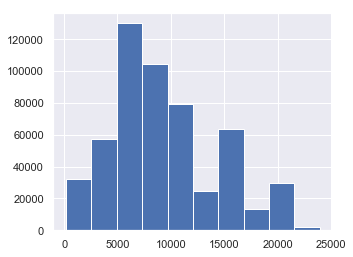

In [20]:
df['Purchase'].hist()

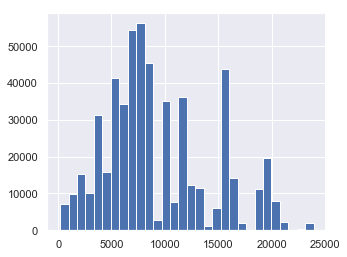

In [18]:
df['Purchase'].hist(bins=30)

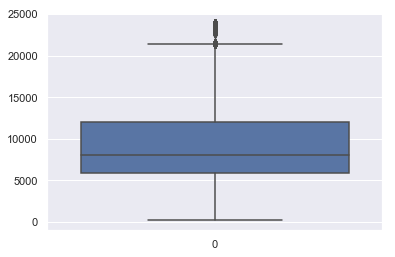

In [5]:
sns.boxplot(data = df['Purchase'])

In [22]:
df['Purchase'].describe()

count    537577.000000
mean       9333.859853
std        4981.022133
min         185.000000
25%        5866.000000
50%        8062.000000
75%       12073.000000
max       23961.000000
Name: Purchase, dtype: float64

In [23]:
df['Purchase'].median()

8062.0

*** Visina racuna je normalno rasporedjena velicina, sto znaci da nije jednaka verovatnoca da se pojavi mali, srednji ili veliki iznos. Najveca verovatnoca je za pojavljivanje iznosa od 5 do 10 hiljada dolara (primecujemo malu duzinu boxplot-a), medjutim i tu treba imati u vidu da u tom intervalu postoje podintervali sa izrazito malom verovatnocom pojavljivanja (sto se vidi kada povecamo broj binova). Ima dosta outlier-a sa visokim iznosima racuna, sto nije ni cudo ako primetimo da je medijana manja od srednje vrednosti, pa je ona i bolja mera za opisivanje srednje vrednosti od samog proseka.

6. Vizualizovati frekvenciju pojavljivanja svake od kategorija u kategoričkim atributima Starost, Zanimanje i Godine života u trenutnom gradu. Da li kupci ove radnje dolaze iz svih grupa podjednako? Prokomentarisati. `Napomena` Occupation atribut je maskiran, što znači da se odnosi na zanimanje ali umesto naziva zanimanja, zbog privatnosti je odlučeno da se vide samo šifre 0,1,2... (plaky)

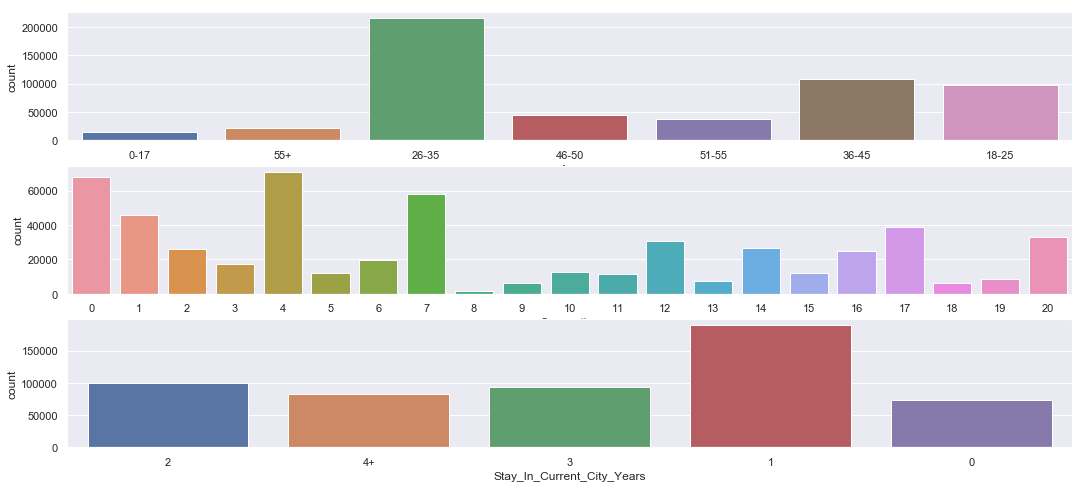

In [29]:
_, axes = plt.subplots(3, 1, figsize=(18, 8))

sns.countplot(x='Age', data=df, ax=axes[0])
sns.countplot(x='Occupation', data=df, ax=axes[1])
sns.countplot(x='Stay_In_Current_City_Years', data=df, ax=axes[2])

*** Najvise kupaca je uzrasti izmedju 26-35 godina, dok je najmanje najmladjih i najstarijih kupaca. Sto se zanimanja tice, vidimo da su kupci zaposleni u razlicitim sferama, sto nam moze reci da zanimanje nije u velikoj meri povezano sa samim proizvodom koji se kupuje. Ipak, postoje odredjena zanimanja za koja je karakteristicna veca kupovina proizvoda, ali s obzirom da ne znamo koja su to zanimanja, ne mozemo znati da li je uzrok tome plata ili vrsta posla. Takodje, vidimo da je najvise ljudi koji u trenutnom gradu zive godinu dana. 

7. Da li visina računa zavisi od bračnog statusa? Vizualizovati. 

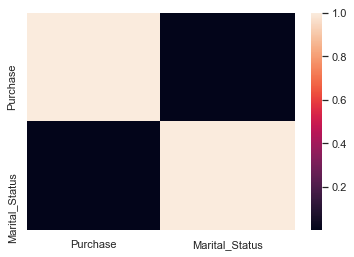

In [6]:
df_corr = df[[ 'Purchase', 'Marital_Status']]
corr_matrix = df_corr.corr(method = 'pearson')
sns.heatmap(corr_matrix)

*** Ne postoji korelacija izmedju ova dva atributa.

Skriveni domaci - razlika izmedju pearson, kendall i spearman korelacije.
Pearson korealcija se najvise koristi za racunanje zavisnosti izmedju dve kontinualne varijable, odnosno kada promena na
jednoj varijabli utice na proporcionalnu promenu na drugoj.
Spearman korelacija razmatra monotonu vezu izmedju kontinualnih ili jos cesce ordinanih varijabli (kada imamo rangirane vrednosti).
U monotonoj povezanosti promena jedne varijable ne uzrokuje nuzno konstantnu promenu druge.
Kendall korelacija se takodje koristi za ordinalne varijable, odnosno za odredjivanje zavisnosti izmedju obelezja rangiranih po
odredjenim kriterijumima.

8. Zabave radi, na osnovu svega ovoga, da li bi mogao/la da pretpostaviš šta prodaje ova kompanija?

Uf, zanimljivo pitanje. Pa vidimo da najvise kupuju ljudi oko 30 godina, pa onda oko 40, da mnogo vise kupuju muskarci od zena, da najvise proizvoda pada u rang od 5-10 hiljada dolara, ali da postoji odredjen broj outlier-a cenovnog ranga preko 200 hiljada dolara (kupovanje radi prestiza), kao i da ih kupuju ljudi zaposleni u razlicitim sferama. Sve to mi daje ideju da su mozda u pitanju automobili. Mada sa druge strane, dosta mladih (18-25 godina) takodje kupuje, a i najveci je broj ljudi koji zive u trenutnom gradu samo godinu dana sto ne ide u prilog mojoj teoriji.